<a href="https://colab.research.google.com/github/mimahb/Used-Car-Price-Prediction/blob/main/Usedcarpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Used Car Dataset.csv to Used Car Dataset (12).csv
Dataset preview: 
   Unnamed: 0                                           car_name  \
0           0                    2017 Mercedes-Benz S-Class S400   
1           1  2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI   
2           2                       2018 BMW X1 sDrive 20d xLine   
3           3                           2019 Kia Seltos GTX Plus   
4           4                    2019 Skoda Superb LK 1.8 TSI AT   

  registration_year insurance_validity fuel_type  seats  kms_driven  \
0            Jul-17      Comprehensive    Petrol      5       56000   
1            Jan-21      Comprehensive    Petrol      5       30615   
2            Sep-18      Comprehensive    Diesel      5       24000   
3            Dec-19      Comprehensive    Petrol      5       18378   
4            Aug-19      Comprehensive    Petrol      5       44900   

    ownsership transmission manufacturing_year  mileage(kmpl)  engine(cc)  \
0  First Own

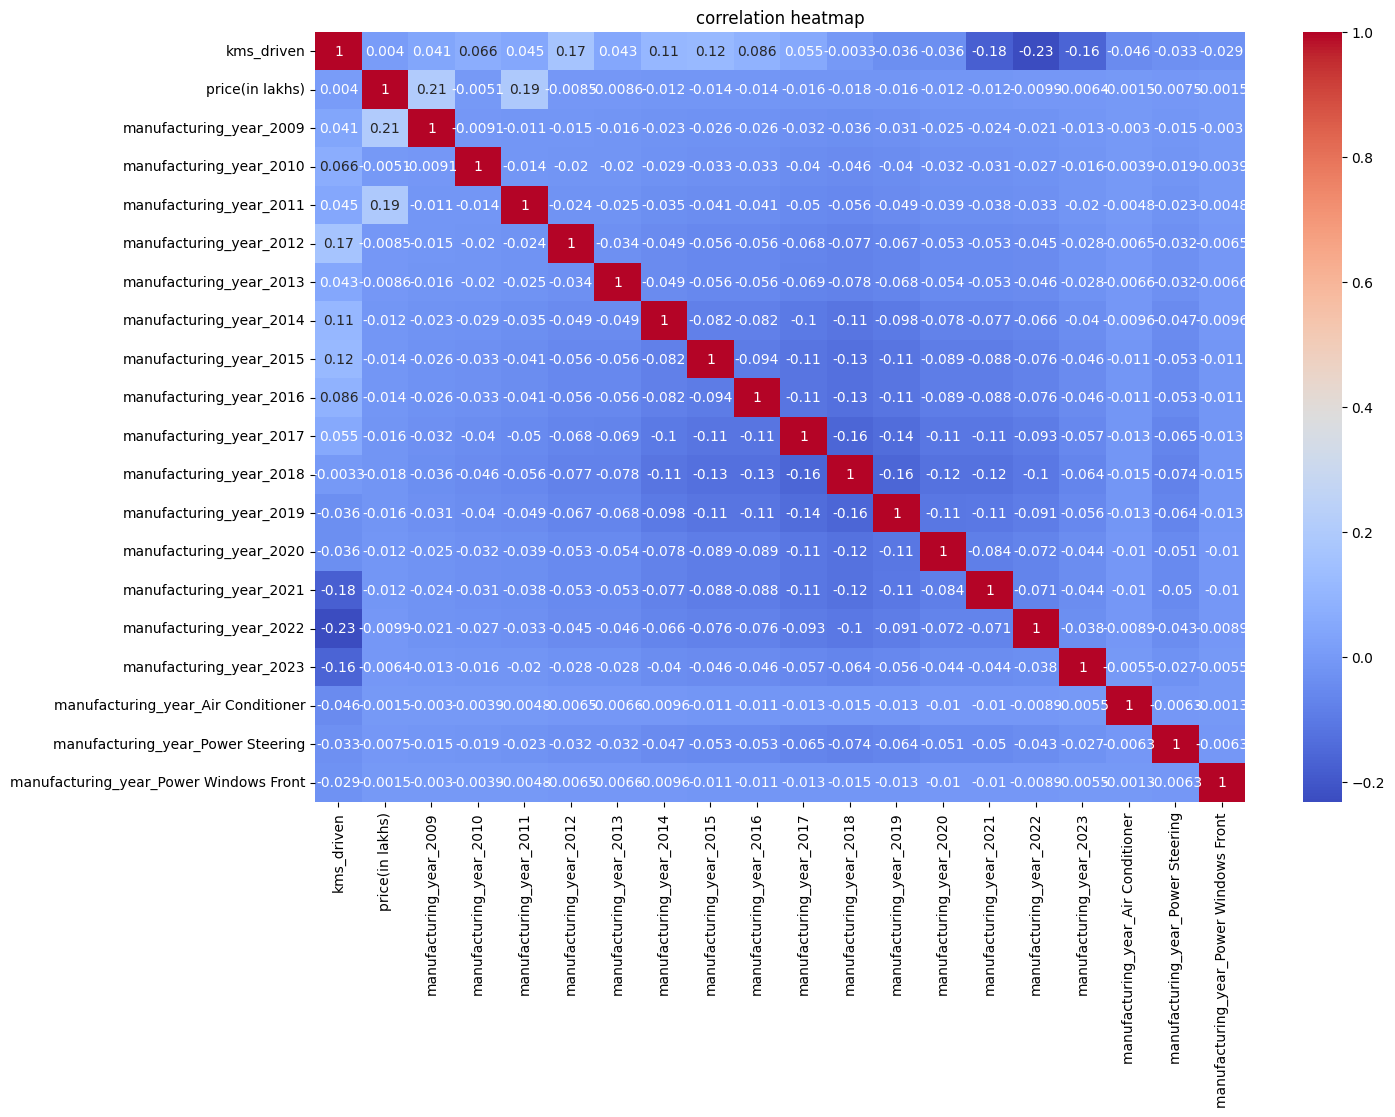

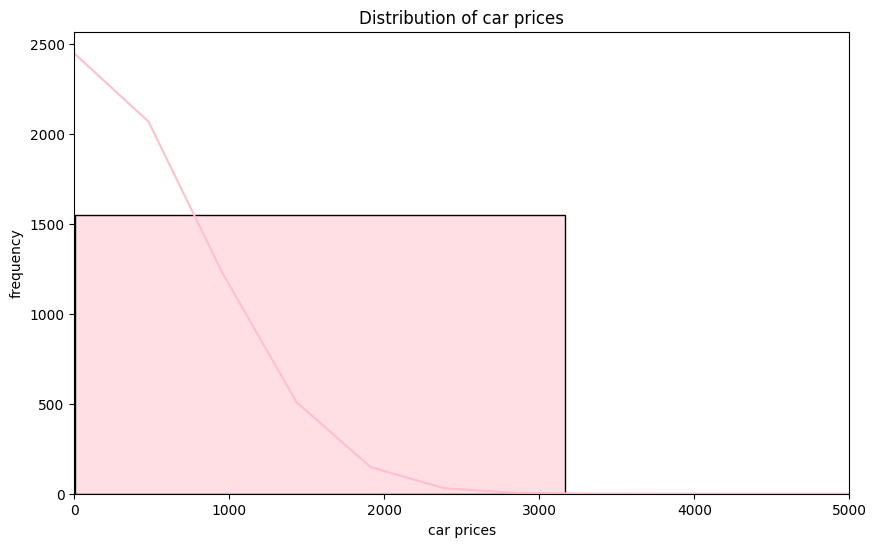

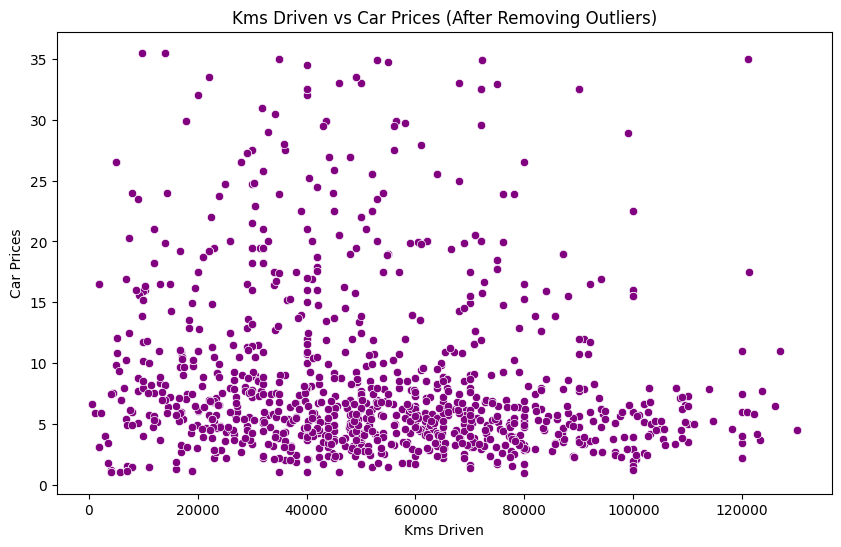


Linear Regression Performance:
RMSE: 5446.566031857537
R-squared: -0.025859598565606046

Random Forest Regression Performance:
RMSE: 5477.216300382652
R-squared: -0.025859598565606046


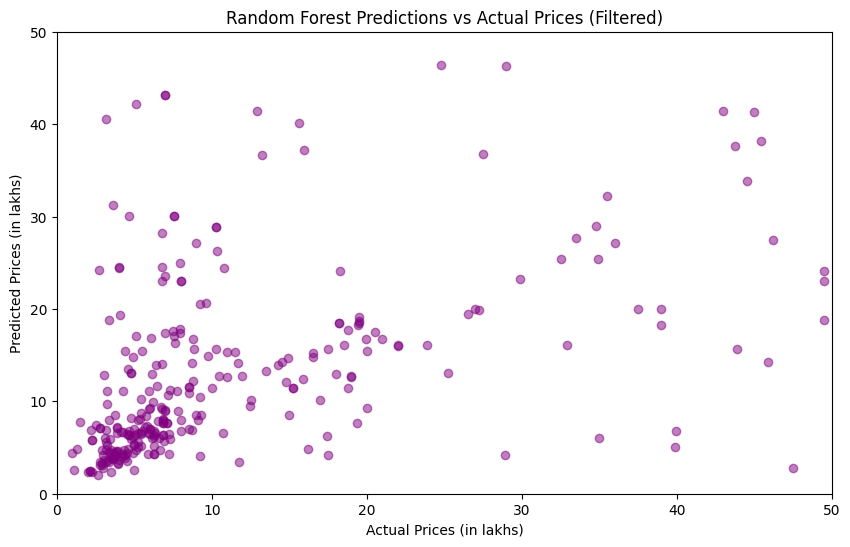

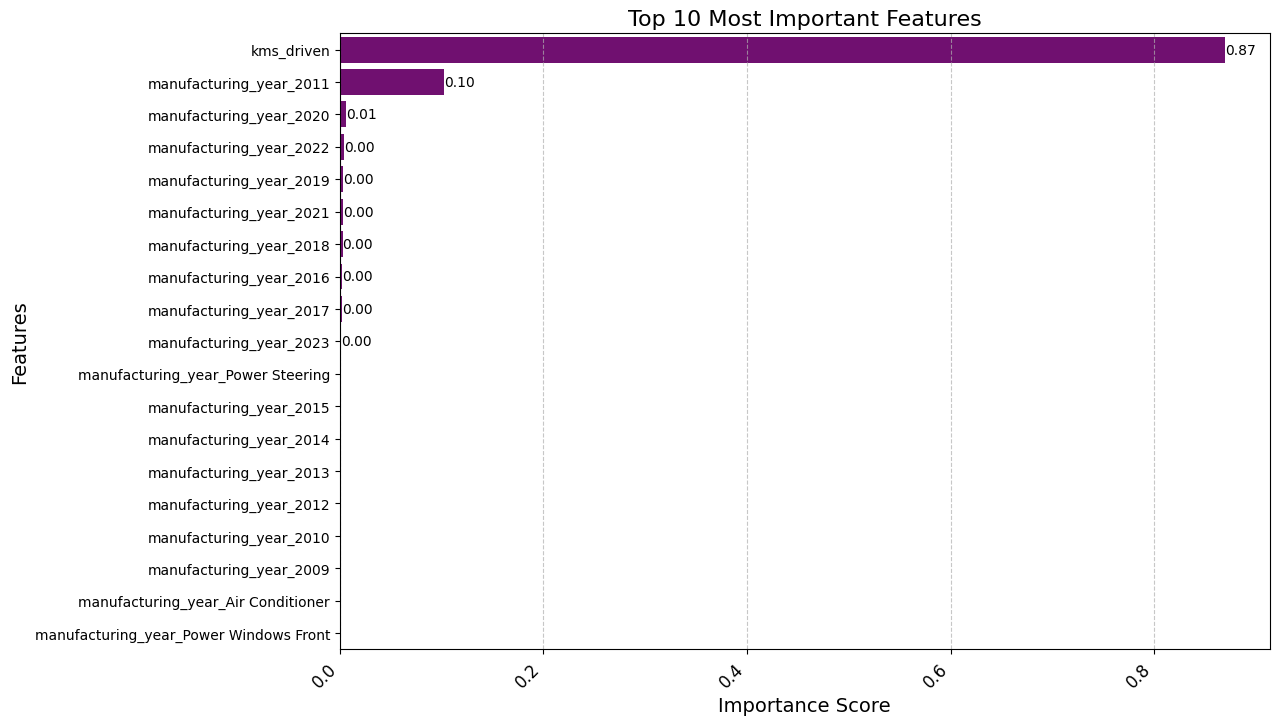

In [13]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#upload csv file
from google.colab import files
uploaded = files.upload()

#load the data
data = pd.read_csv("Used Car Dataset.csv")

#explore the file
print("Dataset preview: ")
print(data.head())

print("\nDataset information:")
print(data.info())

print("\nDataset summary")
print(data.describe())

print("\nMissing values in dataset")
print(data.isnull().sum())

data['year'] = data['car_name'].str.extract('(\d{4})')
data['brand'] = data['car_name'].str.extract('(\w+)$')

data['reg_year'] = data['registration_year'].str.extract('(\d{2})')
data['reg_month'] = data['registration_year'].str.extract('-(\w+)$')


data = pd.get_dummies(data, columns=['brand', 'reg_month', 'insurance_validity', 'fuel_type', 'ownsership', 'transmission', 'manufacturing_year'], drop_first=True)
data = data.drop(['car_name', 'registration_year'], axis=1)

key_features = ['kms_driven', 'price(in lakhs)']

key_features.extend([col for col in data.columns if col.startswith(('manufacturing_year_',))])

data = data[key_features]

numeric_features = ['kms_driven', 'price(in lakhs)']

numeric_features.extend([col for col in data.columns if col.startswith(('manufacturing_year_'))])



#visualize correlation between the features and the target value
plt.figure(figsize=(15, 10))
sns.heatmap(data[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()

#visualze the distribution of the target variable ('car prices)
plt.figure(figsize=(10, 6))
sns.histplot(data['price(in lakhs)'], kde=True, bins=30, color='pink')
plt.xlim(0, 5000)
plt.title('Distribution of car prices')
plt.xlabel('car prices')
plt.ylabel('frequency')
plt.show()

Q1_kms = data['kms_driven'].quantile(0.25)  # 25th percentile
Q3_kms = data['kms_driven'].quantile(0.75)  # 75th percentile
IQR_kms = Q3_kms - Q1_kms  # Interquartile range

lower_bound_kms = Q1_kms - 1.5 * IQR_kms
upper_bound_kms = Q3_kms + 1.5 * IQR_kms

# For price(in lakhs)
Q1_price = data['price(in lakhs)'].quantile(0.25)  # 25th percentile
Q3_price = data['price(in lakhs)'].quantile(0.75)  # 75th percentile
IQR_price = Q3_price - Q1_price  # Interquartile range

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Filter the data to remove outliers
filtered_data = data[
    (data['kms_driven'] >= lower_bound_kms) & (data['kms_driven'] <= upper_bound_kms) &
    (data['price(in lakhs)'] >= lower_bound_price) & (data['price(in lakhs)'] <= upper_bound_price)
]

#visualize kms driven vs car prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_data['kms_driven'], y=filtered_data['price(in lakhs)'], color='purple')
plt.title('Kms Driven vs Car Prices (After Removing Outliers)')
plt.xlabel('Kms Driven')
plt.ylabel('Car Prices')
plt.show()


#data preprocessing
#drop missing values
data = data.dropna()

#split the dataset into features x and target y
x = data.drop(columns=['price(in lakhs)'], axis=1)
y = data['price(in lakhs)']

#splitting into training and testing sets 80/20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#feature scaling using standarscaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#model building
#linear regression
Ir_model = LinearRegression()
Ir_model.fit(x_train, y_train)

#making predictions with linear regression
Ir_predictions = Ir_model.predict(x_test)

#evaluationg linearregression
print("\nLinear Regression Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, Ir_predictions))}")
print(f"R-squared: {r2_score(y_test, Ir_predictions)}")

#random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

rf_predictions = rf_model.predict(x_test)

# Define a reasonable price range (e.g., up to 50 lakhs)
filtered_data = data[data['price(in lakhs)'] <= 50]


#evaluate random forest regression
print("\nRandom Forest Regression Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_predictions))}")
print(f"R-squared: {r2_score(y_test, Ir_predictions)}")

#visualizing predictions
plt.figure(figsize=(10, 6))
predictions = pd.DataFrame({'predicted_prices': rf_predictions, 'actual_prices': y_test})
plt.scatter(y_test, predictions['predicted_prices'], alpha=0.5, color='purple')
plt.title('Random Forest Predictions vs Actual Prices (Filtered)')
plt.xlabel('Actual Prices (in lakhs)')
plt.ylabel('Predicted Prices (in lakhs)')
plt.xlim(0, 50)  # Adjust range to focus on relevant prices
plt.ylim(0, 50)
plt.show()

importance = rf_model.feature_importances_
feature_names = x.columns

importance_df = pd.DataFrame({'feature': feature_names, 'importance': importance})
importance_df = importance_df.sort_values(by= 'importance', ascending=False)

top_n = 10
top_features = importance_df.head(top_n)



#visualizing feature importance for random forest
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, color='purple')
plt.title(f'Top {top_n} Most Important Features', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for i, (importance, feature) in enumerate(zip(top_features['importance'], top_features['feature'])):
    plt.text(importance, i, f'{importance:.2f}', va='center', fontsize=10)  # Format to 2 decimal places
plt.show()


